In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
class Neuron:
    def __init__(self, features, lr):
        self.lr = lr
        self.weights = np.random.rand(features)

    def activate(self, inputs):
        return np.dot(inputs, self.weights)

    def hebbian_learn(self, inputs, epochs = 100):
        for _ in range(epochs):
            for p in inputs:
                self.weights += self.lr * self.activate(p) * p
            norm = np.linalg.norm(self.weights)
            if norm > 0:
                self.weights /= norm

In [8]:
x = np.random.randint(0, 100, 1000)
noise = np.random.normal(2, 50, size = x.shape)
y = 3 * x + 2 + noise
inputs = np.column_stack((x, y))

In [9]:
mean = np.mean(inputs, axis = 0)
center = inputs - mean

In [10]:
neuron = Neuron(2, 0.00001)
neuron.hebbian_learn(center)
w = neuron.weights * 500

In [12]:
pca = PCA(n_components = 1)
pca.fit_transform(center)
origin = np.array([0, 0])

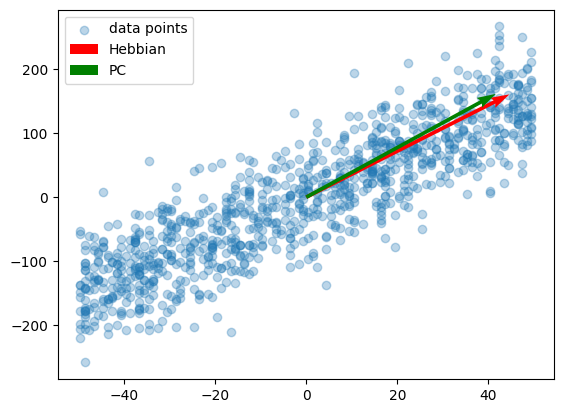

In [16]:
plt.scatter(center[:, 0], center[:, 1], alpha = 0.3, label = 'data points')
plt.quiver(*origin, *w, color = 'r', scale = 3, scale_units = 'xy', angles = 'xy', label = 'Hebbian')
plt.quiver(*origin, *pca.components_[0] * 500, color = 'g', scale = 3, scale_units = 'xy', angles = 'xy', label = 'PC')
plt.legend()
plt.show()